In [3]:
import pandas as pd
import numpy as np
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
from ipynb.fs.full.utils import get_df, rename_values,remove_value
from ipynb.fs.full.plots import single_barplot
from ipynb.fs.full.bootstrapping_utils import bootstrapping, confidence_interval
from statistics import mean, pstdev

In [4]:
# get formatted and ready to use dataframe
df = get_df()
df = df[['Q14_Model_Deploy_Pipeline_Yes', 'Q14_Model_Deploy_Pipeline_No']]
df.head(10)

,Q14_Model_Deploy_Pipeline_Yes,Q14_Model_Deploy_Pipeline_No
2,not quoted,not quoted
3,not quoted,quoted
4,not quoted,quoted
5,not quoted,quoted
6,quoted,not quoted
7,not quoted,quoted
8,not quoted,quoted
9,quoted,not quoted
10,not quoted,not quoted
11,not quoted,not quoted


In [5]:
# the possible answers are the ones in columns
valid_options_list = [column.split("Q14_Model_Deploy_Pipeline_")[1] for column in list(df.columns)]

In [6]:
# answers could be composed by more than one option, so we will have an array of selected options
valid_answers_list = []
prefix = 'Q14_Model_Deploy_Pipeline_'
for idx, row in df.iterrows():
    answer = []
    for option in valid_options_list:
        # if the option was selected, we add to our current answer
        if row[prefix + option] == 'quoted':
            answer.append(option)
    
    valid_answers_list.append(answer)

In [7]:
bootstrapped_dict_data = bootstrapping(answers=valid_answers_list, all_options=valid_options_list,
                                       replacements=1000, population_size=1000, question_type='multiple')

In [8]:
lower, X_mean, upper = confidence_interval(data_points=bootstrapped_dict_data['Yes'])
print("Mean: " + str(X_mean) + "| Lower: " + str(lower) + "| Uper: " + str(upper))

Mean: 17.7393| Lower: 17.702037886227764| Uper: 17.776562113772236


In [9]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]))]
    values += bootstrapped_dict_data[idx]


In [10]:
# build a dataframe from the population metrics
bootstrapped_df = pd.DataFrame()
bootstrapped_df['ML Ops'] = indexes
bootstrapped_df['Value'] = values

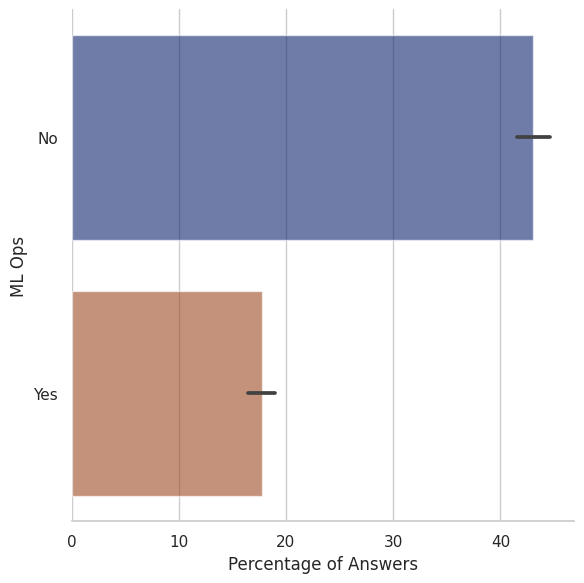

In [12]:
# draw bar plot graphics
q14_plot = sns.catplot(data=bootstrapped_df.sort_values(by=['Value'], ascending = False), 
                      kind="bar", x="Value", y="ML Ops", ci="sd", 
                      palette="dark", alpha=.6, height=6)
q14_plot.despine(left=True)
q14_plot.set_axis_labels("Percentage of Answers", "ML Ops")